# Problem statement

In the face of burgeoning urban populations and evolving socio-economic dynamics, a distinguished group of investors seeks to establish a real estate 
firm in the vibrant city of Paris. They wish to address the pressing issue of affordable housing that has emerged as a critical challenge.
Recognizing the intricacies of the local market, they have engaged Mali Safi and Sons to analyze existing data, draw meaningful insights, and 
guide their strategic decisions. Mali safi and sons has decided to use regression models to understand how different variables affect the real 
estate market and identify trends that the business can take advantage of.

Essentially the real estate company wants:

i. To identify the variables affecting the prices 

ii. To construct a regression model that correlates the property prices with the variables
  
iii. To evaluate the performance of the regression model in identifying the factors affecting property prices.

# Data Understanding

In [32]:
#importing relevant modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression


In [34]:
#Loading the dataframe and viewing the first 10 rows
df = pd.read_csv('ParisHousing.csv')
df.head(10)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
5,39223,36,0,1,17,39489,8,6,2012,0,1,2009,4552,757,0,1,3926647.2
6,58682,10,1,1,99,6450,10,9,1995,1,1,5930,9453,848,0,5,5876376.5
7,86929,100,1,0,11,98155,3,4,2003,1,0,6326,4748,654,0,10,8696869.3
8,51522,3,0,0,61,9047,8,3,2012,1,1,632,5792,807,1,5,5154055.2
9,39686,42,0,0,15,71019,5,8,2021,1,1,5198,5342,591,1,3,3970892.1


In [35]:
#Checking the shape of the data
df.shape

(10000, 17)

Our dataset has 10000 rows and 17 columns

In [36]:
#Understanding the general information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [38]:
#Understanding the descriptive statistics of the data
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


# Data Preparation and Cleaning

## Defining Variables
Dependent variable:
   
    1. Price

Independent variables: 
    
    1. Square meters
    2. No of rooms
    3. Has pool
    4. Has yard
    5. Year made
    6. Is new built
    7. Has storm protector
    8. Basement
    9. Attic
    10. Garage
    11. Storage room
    12. Guest room

Categorical Variables:

    1. has_pool
    2. has_storm_protector
    3. has_basement
    4. has_attic
    5. has_garage
    6. has_storage_room
    7. has_guest_room
    8. made: year the property was made
    9. isNewBuilt
    10. floors

Continuous Variables:

    1. Price
    2. square meters: Size of the Property
    3. Number of Rooms

In [39]:
#Creating a new dataframe for analysis
new_df = df.loc[:, ['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors', 'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector',
                      'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom', 'price']]
new_df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [40]:
#Checking for null values
new_df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [41]:
#Checking for duplicates
new_df.duplicated().sum()

0

## Checking for outliers

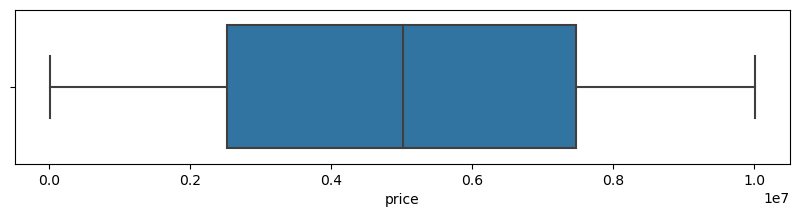

In [42]:
#checking for outliers for price
plt.figure(figsize=(10,2))

sns.boxplot(x = 'price', data = new_df)

# Display the plot
plt.show()

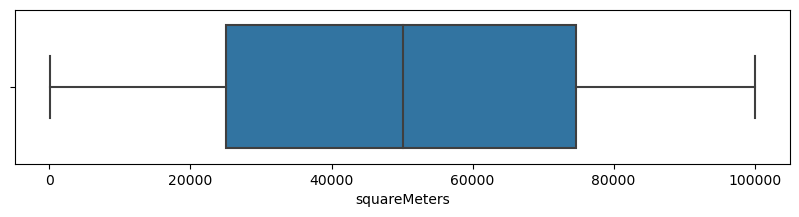

In [43]:
#checking for outliers for squareMeters
plt.figure(figsize=(10,2))

sns.boxplot(x = 'squareMeters', data = new_df)

# Display the plot
plt.show()

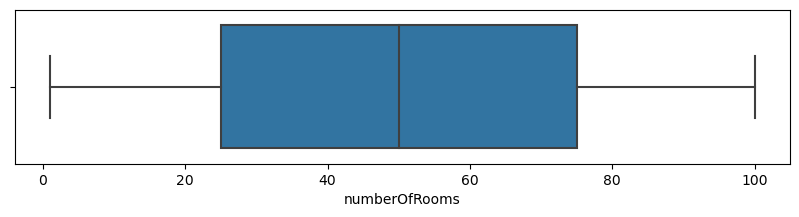

In [44]:
#checking for outliers for numberOfRooms
plt.figure(figsize=(10,2))

sns.boxplot(x = 'numberOfRooms', data = new_df)

# Display the plot
plt.show()

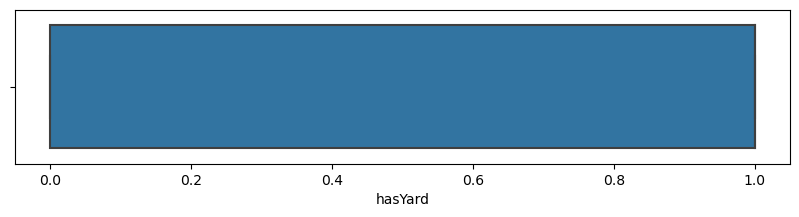

In [45]:
#checking for outliers for hasYard

plt.figure(figsize=(10,2))

sns.boxplot(x = 'hasYard', data = new_df)
# Display the plot
plt.show()

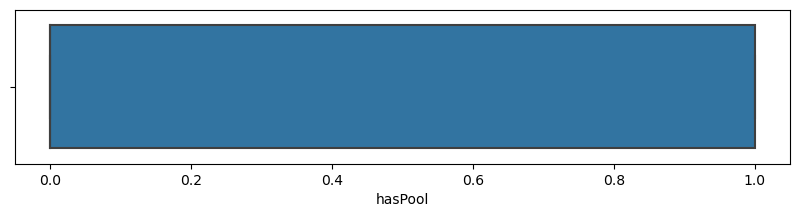

In [46]:
#checking for outliers for hasPool
plt.figure(figsize=(10,2))

sns.boxplot(x = 'hasPool', data = new_df)
# Display the plot
plt.show()

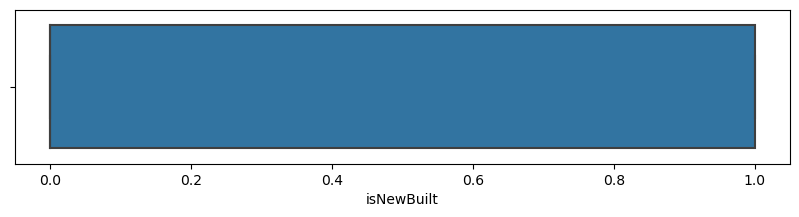

In [47]:
#checking for outliers for isNewBuilt
plt.figure(figsize=(10,2))

sns.boxplot(x = 'isNewBuilt', data = new_df)
# Display the plot
plt.show()

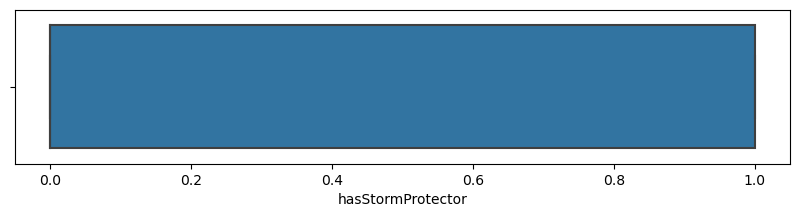

In [48]:
#checking for outliers for hasStormProtector
plt.figure(figsize=(10,2))

sns.boxplot(x = 'hasStormProtector', data = new_df)
# Display the plot
plt.show()

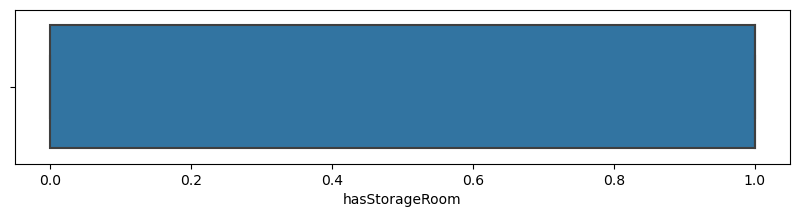

In [49]:
#checking for outliers for hasStorageRoom
plt.figure(figsize=(10,2))

sns.boxplot(x = 'hasStorageRoom', data = new_df)
# Display the plot
plt.show()

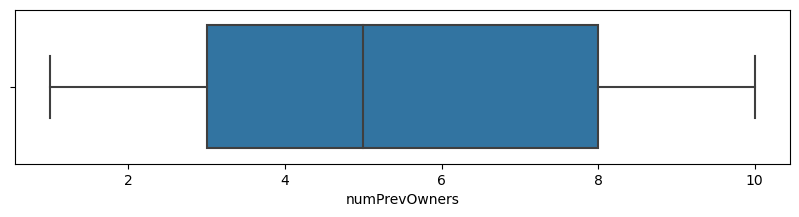

In [50]:
#checking for outliers for numPrevOwners

plt.figure(figsize=(10,2))

sns.boxplot(x = 'numPrevOwners', data = new_df)
# Display the plot
plt.show()

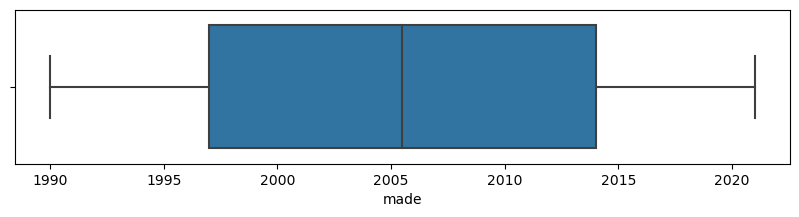

In [51]:
#checking for outliers for made
plt.figure(figsize=(10,2))

sns.boxplot(x = 'made', data = new_df)
# Display the plot
plt.show()

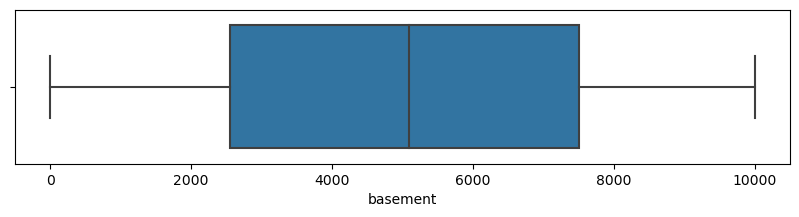

In [52]:
#checking for outliers for basement
plt.figure(figsize=(10,2))

sns.boxplot(x = 'basement', data = new_df)
# Display the plot
plt.show()

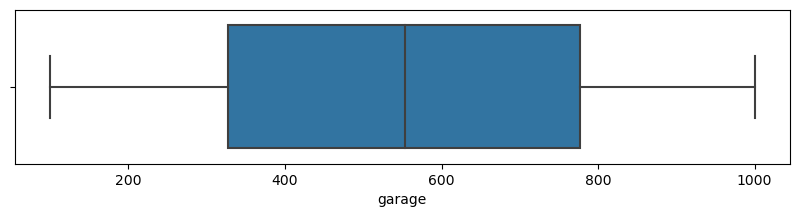

In [53]:
#checking for outliers for garage
plt.figure(figsize=(10,2))

sns.boxplot(x = 'garage', data = new_df)
# Display the plot
plt.show()

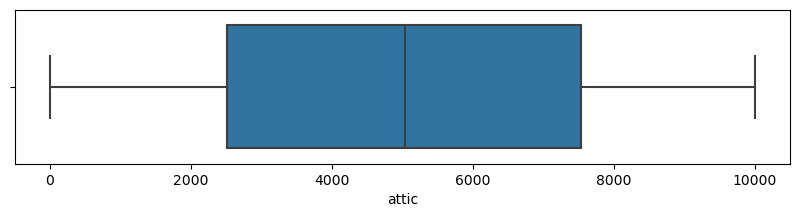

In [54]:
#checking for outliers for attic
plt.figure(figsize=(10,2))

sns.boxplot(x = 'attic', data = new_df)
# Display the plot
plt.show()

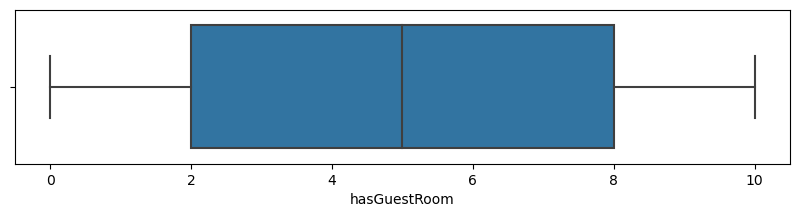

In [55]:
#checking for outliers for hasGuestRoom
plt.figure(figsize=(10,2))

sns.boxplot(x = 'hasGuestRoom', data = new_df)
# Display the plot
plt.show()

# Exploratory Data analysis

In [56]:
new_df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [60]:
# Apply log transformations to each variable
df_transformed = new_df.applymap(lambda x: np.log(x) if x > 0 else 0)

# Display the transformed dataset
print("\nLog-Transformed Dataset:")


Log-Transformed Dataset:


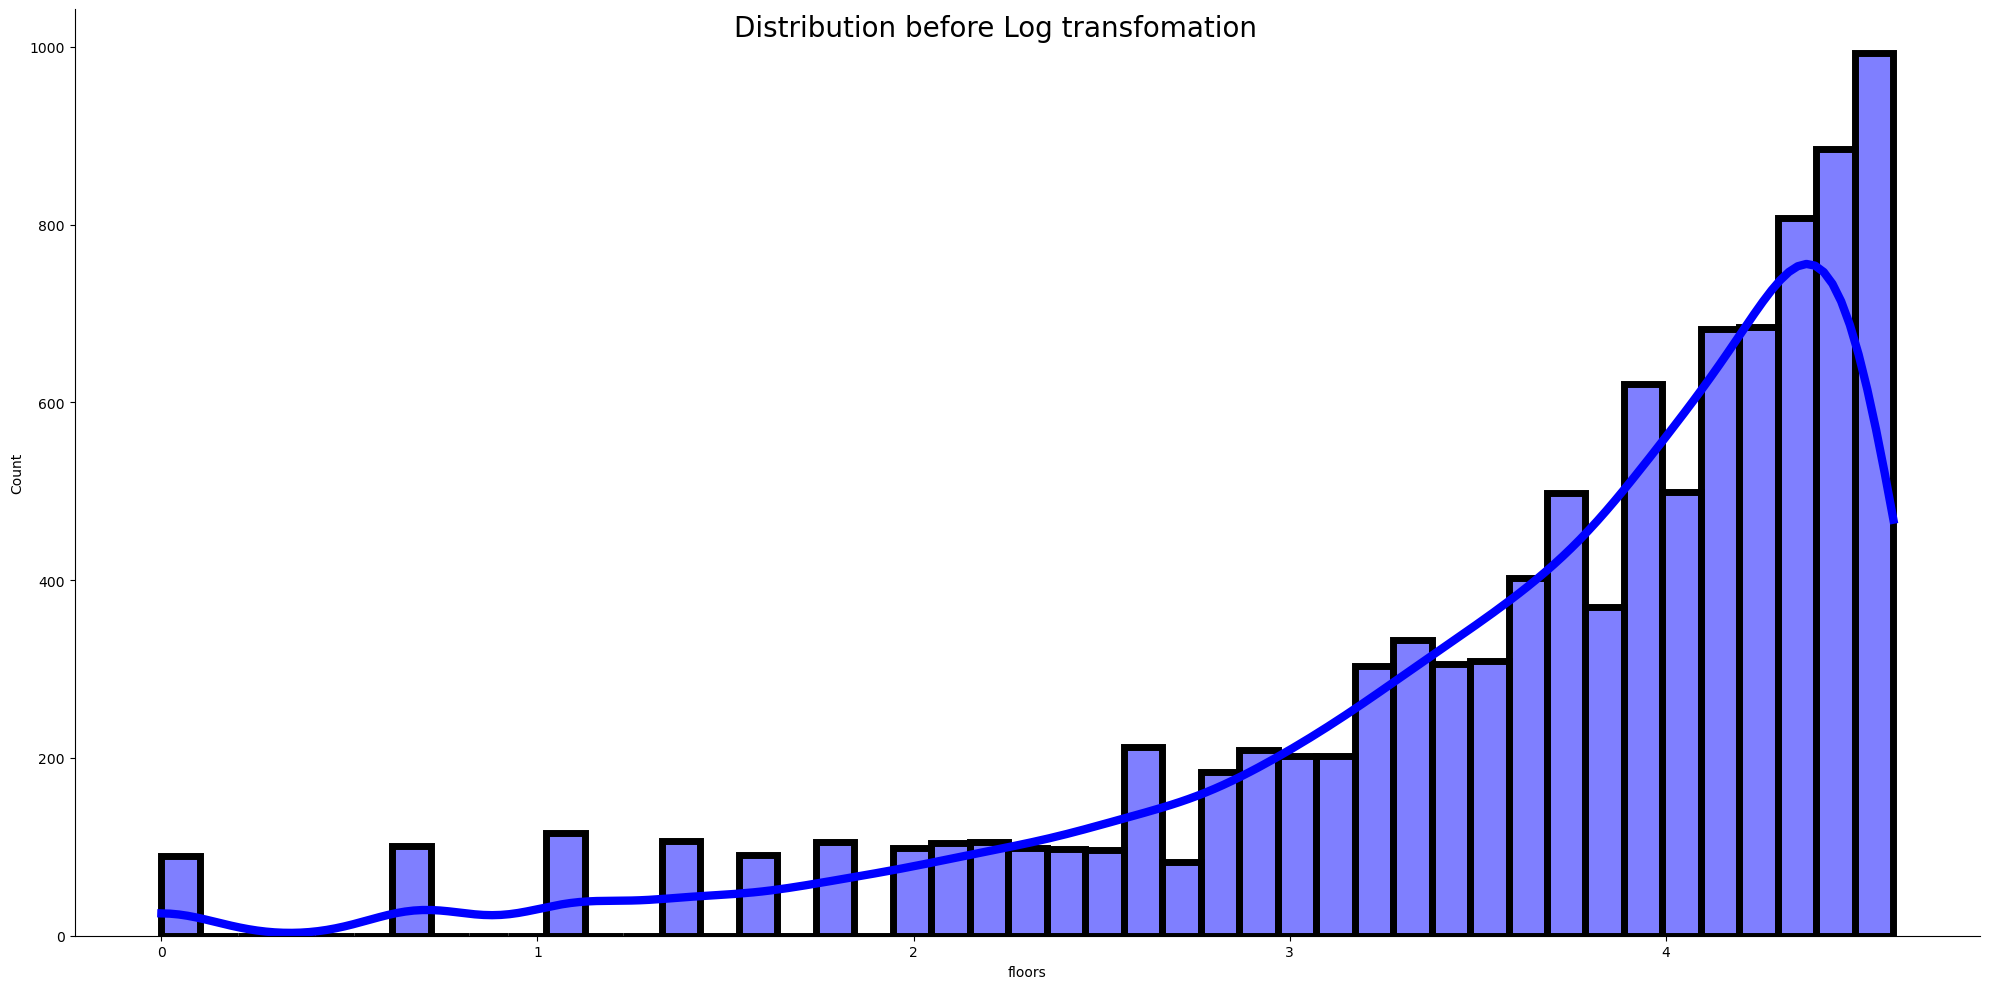

In [61]:
ax = sns.displot(df_transformed['floors'], kde = True, line_kws={'color': 'black', 'lw': 6} , color = "blue", height=10, aspect=2,
            linewidth = 5 )

ax.fig.suptitle('Distribution before Log transfomation', size = 20)
plt.show()

In [62]:
# p = np.log(df['squareMeters'])

# ax = sns.displot(p, kde = True , line_kws={'color': 'black', 'lw': 6} , color = "black", height=10, aspect=2,
#             linewidth = 0.3)

# ax.fig.suptitle('Distribution after Log transfomation', size = 18)

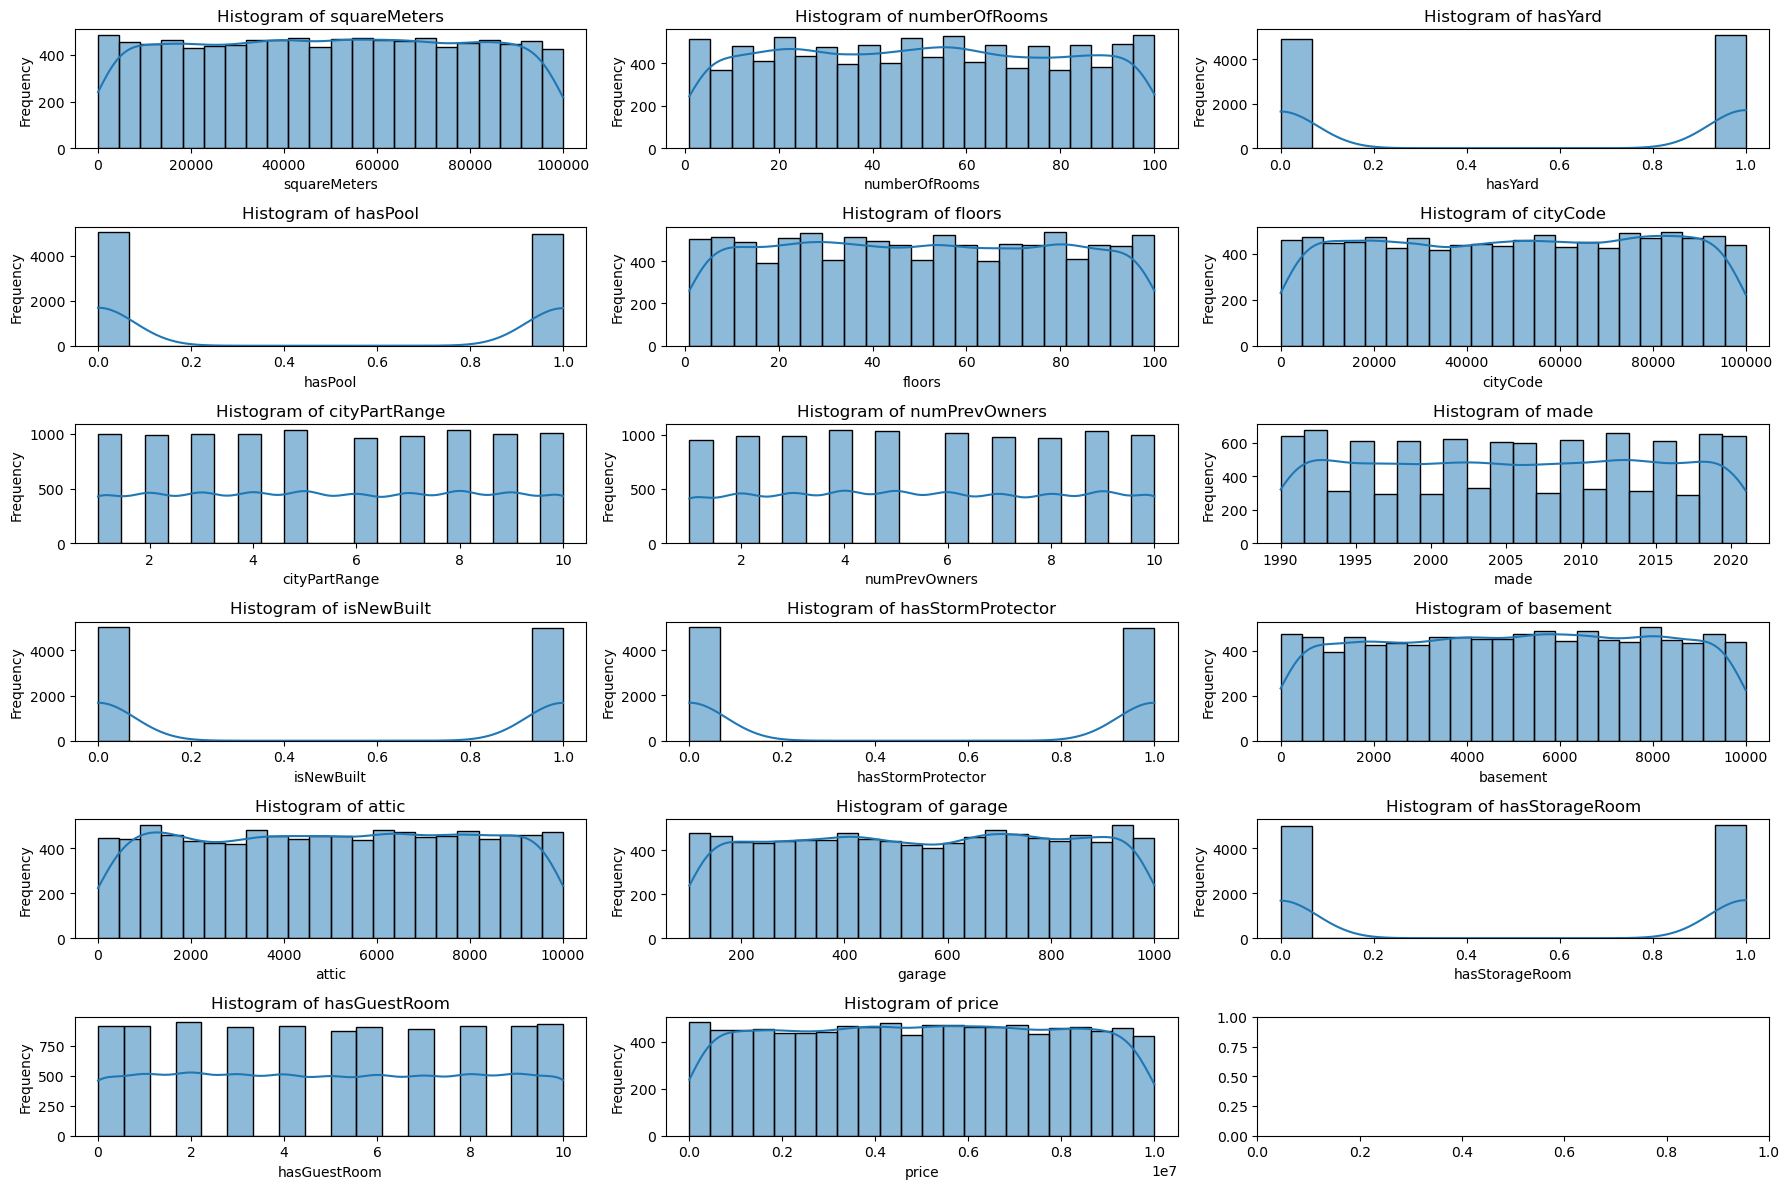

In [64]:
fig, axes = plt.subplots(6, 3, figsize=(18, 12))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    ax = axes[i]
    sns.histplot(df[column], kde=True, ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

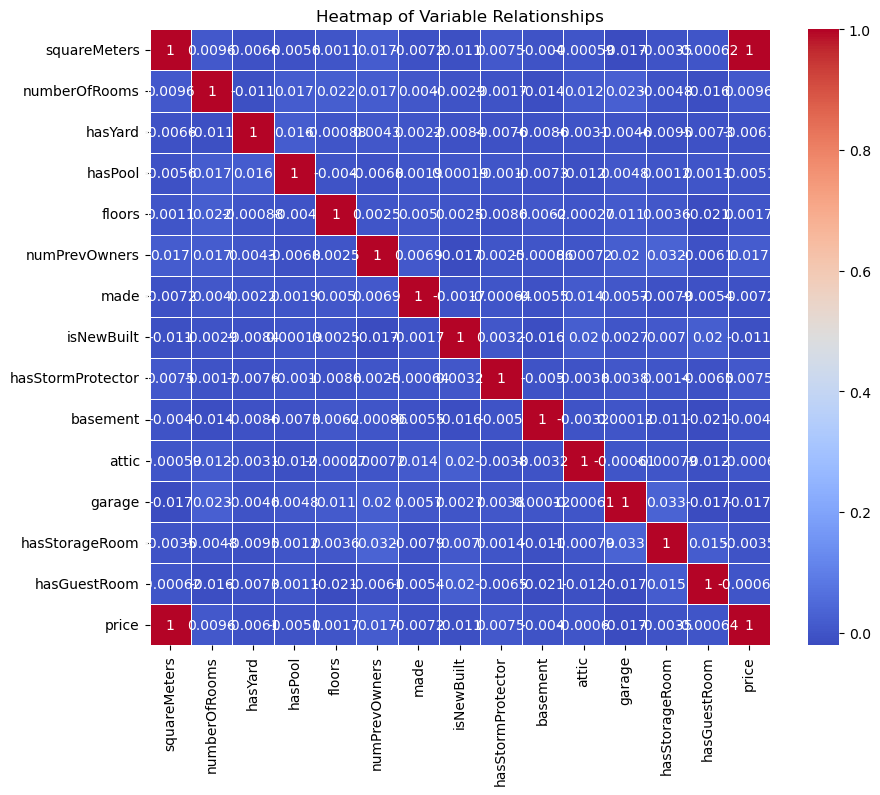

In [65]:
correlation_matrix = new_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Variable Relationships')
plt.show()

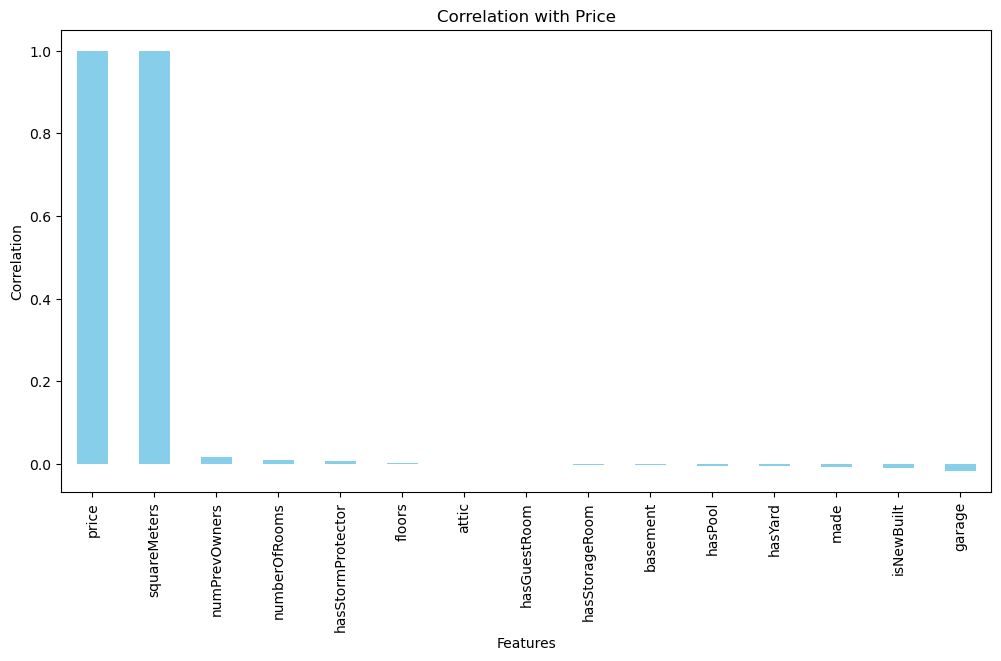

In [66]:
correlation_with_price = new_df.corr()['price'].sort_values(ascending=False)

correlation_with_price.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Correlation with Price')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
# Specify the features (X) and the target variable (y)
X = new_df.drop('price', axis=1)
y = new_df['price']

# Split the dataset into training and testing sets
# The test_size parameter specifies the proportion of the dataset to include in the test split (here, 20%)
# The random_state parameter ensures reproducibility by fixing the random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can use X_train and y_train for training your model
# and X_test and y_test for evaluating its performance
X_test

,squareMeters,numberOfRooms,hasYard,hasPool,floors,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
6252,79553,7,1,0,61,2,1996,1,1,3372,7603,896,1,1
4684,37047,79,1,1,87,3,2019,1,0,5658,8216,160,0,5
1731,85476,36,1,0,44,7,1992,0,1,6698,6043,692,1,7
4742,64209,30,1,1,55,5,1992,1,0,9761,6148,525,1,0
4521,64550,89,1,1,68,2,2019,0,0,1945,8269,495,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,69418,3,1,1,70,6,1992,0,1,1835,543,314,0,6
8285,81453,89,1,0,83,4,2007,1,0,4244,3735,527,1,10
7853,19446,22,1,0,58,10,2018,1,0,1437,2804,391,1,5
1095,29392,42,1,0,45,7,2003,1,0,299,2376,200,1,9


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Create a linear regression model
model = LinearRegression()

# Train the model using the training set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')
# The model is now trained and can be used for making predictions

Mean Squared Error: 3703034.9446056415
R-squared Score: 0.9999995772190791


In [70]:
results_1 = smf.ols('price ~ squareMeters', data = new_df).fit()
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.775e+09
Date:                Wed, 31 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:29:52   Log-Likelihood:                -95093.
No. Observations:               10000   AIC:                         1.902e+05
Df Residuals:                    9998   BIC:                         1.902e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6460.8797     65.294     98.950      0.000    6332.889    6588.870
squareMeters    99.9995      0.001   8.82e+04      0.000      99.997     100.002
==============================================================================
Omnibus:                      293.912   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.896
Skew:                           0.420   Prob(JB):                     1.87e-68
Kurtosis:                       2.791   Cond. No.                     1.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
from sklearn.metrics import mean_squared_error

# Step 1 : split the data into train and test sets

train_data,test_data=train_test_split(new_df,train_size=0.8,random_state=3)

# Step 2 : Train the model on the Training set
reg=LinearRegression()

x_train=np.array(train_data['squareMeters']).reshape(-1,1)

y_train=np.array(train_data['price']).reshape(-1,1)

reg.fit(x_train,y_train)

# Step 3 : Predict the test results

x_test=np.array(test_data['squareMeters']).reshape(-1,1)

y_test=np.array(test_data['price']).reshape(-1,1)
print('R squared training',round(reg.score(x_train,y_train),3))

print('R squared testing',round(reg.score(x_test,y_test),3) )

print('intercept',reg.intercept_)

print('coefficient',reg.coef_)

R squared training 1.0
R squared testing 1.0
intercept [6449.08706615]
coefficient [[99.99919396]]


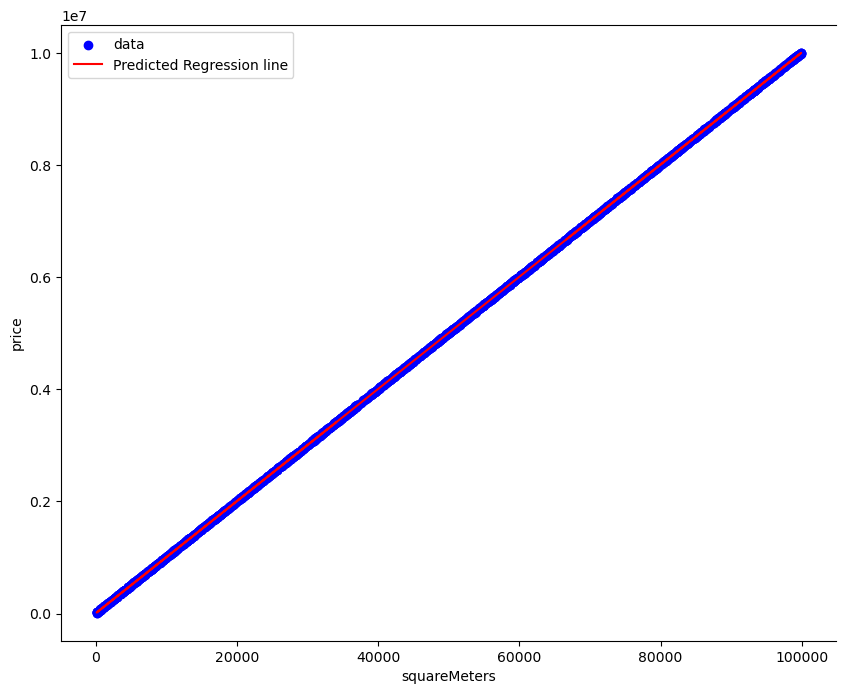

In [73]:
_, ax = plt.subplots(figsize= (10, 8))

plt.scatter(x_test, y_test, color= 'blue', label = 'data')

plt.plot(x_test, reg.predict(x_test), color='red', label= 'Predicted Regression line')

plt.xlabel('squareMeters')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [74]:
m_1 = 'price ~ basement + numberOfRooms + squareMeters + attic + garage'

result3 = smf.ols(m_1, data = new_df).fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.555e+09
Date:                Wed, 31 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:30:39   Log-Likelihood:                -95090.
No. Observations:               10000   AIC:                         1.902e+05
Df Residuals:                    9994   BIC:                         1.902e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6364.9474    136.721     46.554

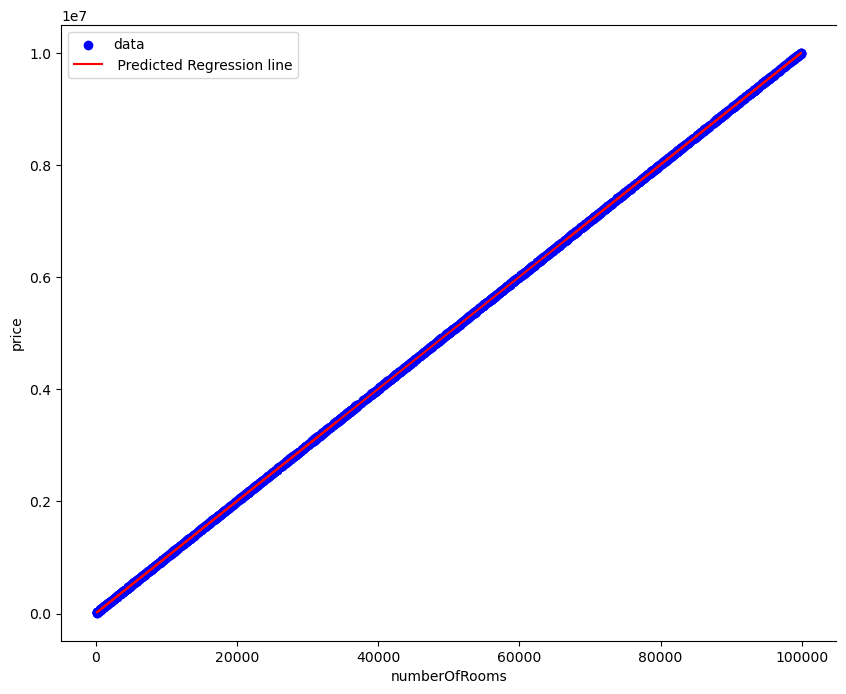

In [75]:
_, ax = plt.subplots(figsize= (10, 8))

plt.scatter(x_test, y_test, color= 'blue', label = 'data')

plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')

plt.xlabel('numberOfRooms')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [76]:
#Comparing the key metrics for both models.
#Result_1
results_1_formula = "price ~ squareMeters"
results_1 = sm.OLS.from_formula(results_1_formula, data=new_df).fit()
results_1_summ = results_1.summary()

# Result3
result3_formula = "price ~ squareMeters + basement + numberOfRooms + attic + garage"
result3 = sm.OLS.from_formula(result3_formula, data=new_df).fit()
result3_summ = result3.summary()

# Comparison of key metrics between the two models
print("results_1 Metrics:")
print(f"R-squared: {results_1.rsquared:.4f}")
print(f"F-statistic: {results_1.fvalue:.2f}")
print(f"AIC: {results_1.aic:.2f}")
print(f"BIC: {results_1.bic:.2f}")
print("\nresult3 Metrics:")
print(f"R-squared: {result3.rsquared:.4f}")
print(f"F-statistic: {result3.fvalue:.2f}")
print(f"AIC: {result3.aic:.2f}")
print(f"BIC: {result3.bic:.2f}")

# Comparison of coefficients and standard errors for both models
print("\nresults_1 Coefficients:")
print(results_1.params)
print("\nResults_1 Standard Errors:")
print(results_1.bse)

print("\nResult3 Coefficients:")
print(result3.params)
print("\nResult3 Standard Errors:")
print(result3.bse)

results_1 Metrics:
R-squared: 1.0000
F-statistic: 7775261858.03
AIC: 190189.15
BIC: 190203.57

result3 Metrics:
R-squared: 1.0000
F-statistic: 1555378538.14
AIC: 190191.05
BIC: 190234.32

results_1 Coefficients:
Intercept       6460.879667
squareMeters      99.999469
dtype: float64

Results_1 Standard Errors:
Intercept       65.294436
squareMeters     0.001134
dtype: float64

Result3 Coefficients:
Intercept        6364.947373
squareMeters       99.999477
basement           -0.006992
numberOfRooms       1.777167
attic              -0.011635
garage              0.180325
dtype: float64

Result3 Standard Errors:
Intercept        136.721253
squareMeters       0.001134
basement           0.011344
numberOfRooms      1.132840
attic              0.011274
garage             0.124566
dtype: float64


In [ ]:
#Checking whether this regression model is better than the previous model
r_squared_results_1 = results_1.rsquared
r_squared_result3 = result3.rsquared
result3_is_better = r_squared_result3 > r_squared_results_1
r_squared_result3
r_squared_results_1   
print(r_squared_result3, r_squared_results_1)

# Analysis and Summary

The distinguished group of investors are faced with the challenge of providing affordable housing in a dynamic urban landscape. Mali Safi and Sons has been hired by a group of investors to conduct data analysis and provide guidance in order to address this. Regression modelling will be used to determine trends and comprehend the variables affecting the real estate market. Based on the objectives stated earlier, They specifically sought to:

Determine the factors influencing real estate costs.
Create a regression model that shows how different variables and property prices are correlated.
Analyse how well the model identified the variables influencing real estate prices.
The dataset has 10,000 entries and 17 columns, and it was loaded from 'ParisHousing.csv'. Gaining an understanding of the types, structures, and summary statistics is necessary for initial data exploration. Both continuous and categorical variables are found and marked for additional examination. Duplicate and missing value handling is part of data preparation.


With boxplots, outliers in important variables like "price" and "squareMeters" can be seen. The data is normalised through the use of log transformations. Histogram plots and a correlation heatmap are two tools used in exploratory data analysis that shed light on the distributions and correlations of variables.

The dataset is used to train a linear regression model, which obtains a high R-squared score on both the training and testing sets. Strong correlations are found between the target variable 'price' and individual regression analyses for'squareMeters' and a multiple regression model that includes 'basement', 'numberOfRooms', 'attic', and 'garage'. The fit of the regression line to the data is shown visually. 
All things considered, the analysis offers the real estate company insightful information that serves as a basis for strategic decision-making aimed at resolving the problem of affordable housing in Paris.
